In [1]:
import xcmocean as xcmo
import xarray as xr
import cmocean.cm as cmo

# xcmocean xarray accessor

The `xcmocean` accessor to `xarray` will select a colormap for your DataArray plot in an opinionated way.

## How it works

Pre-selected regular expressions for categories of variables are compared against the name and attributes of a DataArray that is being plotted to select the `vartype`. Categories for variables were created mostly by grouping together variables with the same units, then choosing metadata words to match those variables. Default options for `vartype` are:

In [24]:
list(xcmo.options.REGEX.keys())

['temp',
 'salt',
 'vel',
 'freq',
 'zeta',
 'rho',
 'energy',
 'depths',
 'accel',
 'freq2',
 'dye']

For each `vartype` there is a sequential and a diverging colormap. If the `vartype` of a DataArray cannot be determined, a default sequential colormap (viridis) and diverging colormap (cmo.balance) are used.

Sequential:

In [36]:
print('vartype   Sequential colormap name')
for vartype, cmap in xcmo.options.SEQ.items():
    print('%s       %s' % (vartype.rjust(7, ' '), cmap.name))

vartype   Sequential colormap name
   temp       thermal
   salt       haline
    vel       speed
   freq       tempo
   zeta       amp
    rho       dense
 energy       speed
 depths       deep
  accel       rain
  freq2       rain
    dye       matter


Diverging:

In [38]:
print('vartype   Diverging colormap name')
for vartype, cmap in xcmo.options.DIV.items():
    print('%s       %s' % (vartype.rjust(7, ' '), cmap.name))

vartype   Diverging colormap name
   temp       balance
   salt       diff
    vel       delta
   freq       curl
   zeta       balance
    rho       diff
 energy       delta
 depths       topo
  accel       tarn
  freq2       tarn
    dye       balance


See "How to change options" below to modify the default options.

## Load example ROMS output

In [9]:
# loc = 'http://barataria.tamu.edu:8080/thredds/dodsC/forecast_latest/txla2_his_f_latest.nc'
loc = '/Users/kthyng/packages/xroms/examples/txla2_his_a_latest.nc'
chunks = {'ocean_time':1}
ds = xr.open_dataset(loc, chunks=chunks)

## Demonstration

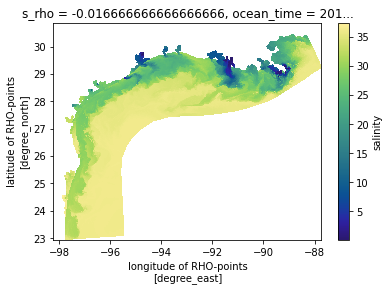

In [14]:
ds.salt.isel(s_rho=-1, ocean_time=0).cmo.plot(x='lon_rho', y='lat_rho')

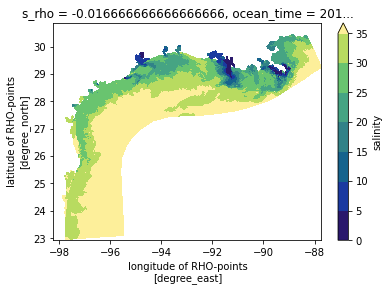

In [19]:
import numpy as np
ds.salt.isel(s_rho=-1, ocean_time=0).plot.pcolormesh(x='lon_rho', y='lat_rho', cmap=cmo.haline, levels=np.arange(0,40,5))
# CONTOURF

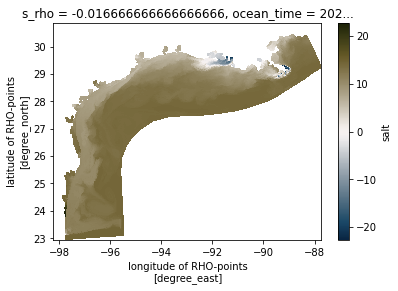

In [46]:
(ds.salt.isel(s_rho=-1, ocean_time=0) - 22).cmo.plot(x='lon_rho', y='lat_rho')

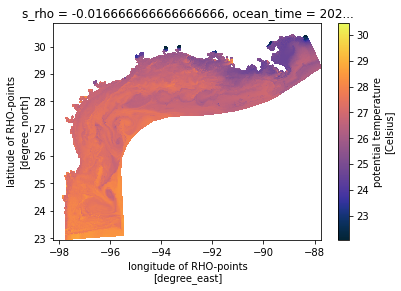

In [17]:
ds.temp.isel(s_rho=-1, ocean_time=0).cmo.plot(x='lon_rho', y='lat_rho')

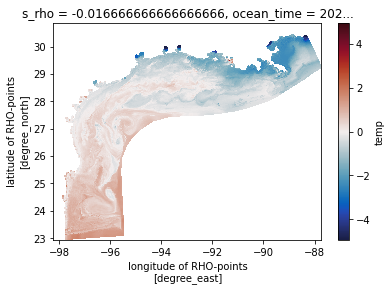

In [45]:
(ds.temp.isel(s_rho=-1, ocean_time=0) - 27).cmo.plot(x='lon_rho', y='lat_rho')

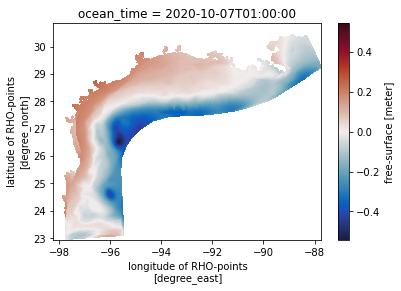

In [7]:
ds.zeta.isel(ocean_time=0).cmo.plot(x='lon_rho', y='lat_rho')

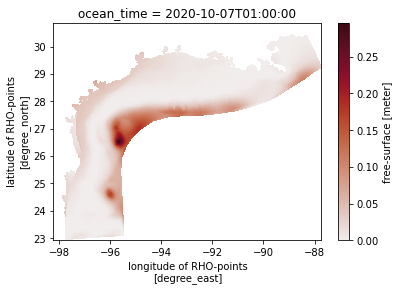

In [58]:
(ds.zeta.isel(ocean_time=0)**2).cmo.plot(x='lon_rho', y='lat_rho')

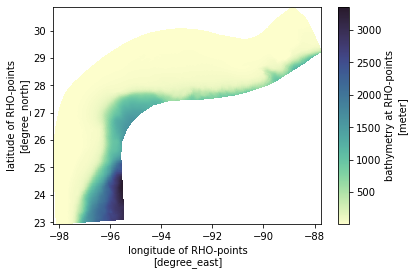

In [8]:
ds.h.cmo.plot(x='lon_rho', y='lat_rho')

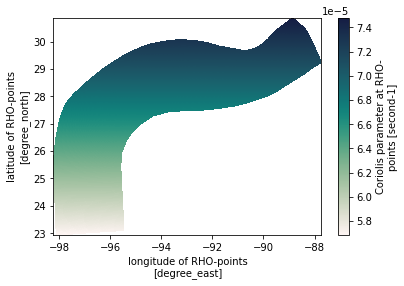

In [9]:
ds.f.cmo.plot(x='lon_rho', y='lat_rho')

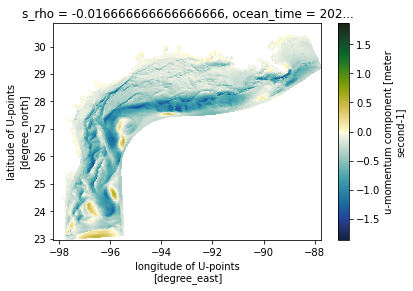

In [16]:
ds.u.isel(s_rho=-1, ocean_time=0).cmo.plot(x='lon_u', y='lat_u')

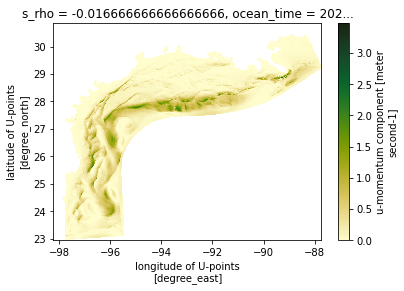

In [57]:
(ds.u.isel(s_rho=-1, ocean_time=0)**2).cmo.plot(x='lon_u', y='lat_u')

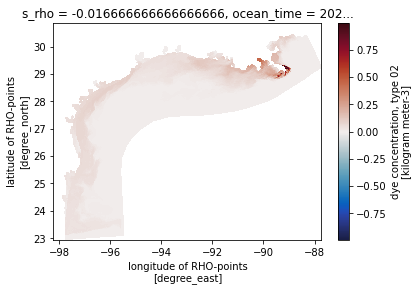

In [15]:
ds.dye_02.isel(s_rho=-1, ocean_time=0).cmo.plot(x='lon_rho', y='lat_rho')

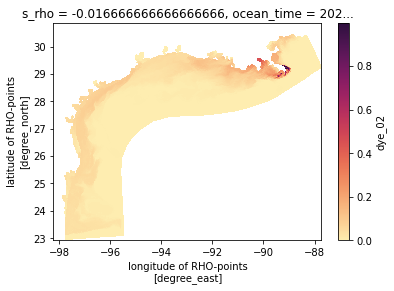

In [60]:
(abs(ds.dye_02.isel(s_rho=-1, ocean_time=0))).cmo.plot(x='lon_rho', y='lat_rho')

### with `cf-xarray`

You can additionally plot with the `cf-xarray` accessor as follows:

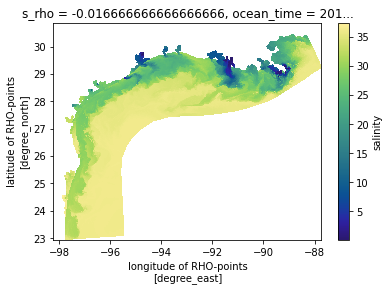

In [12]:
ds.salt.isel(s_rho=-1, ocean_time=0).cmo.cfplot(x='longitude', y='latitude')

## Available utilities

Return `vartype` for a DataArray. To print out what actually matched for a variable, input `verbose=True`.

In [75]:
ds.h.cmo.vartype(verbose=True)

bathy|depths|bathymetry matches bathymetry at RHO-points in attributes


'depths'

Return the sequential colormap and name

In [63]:
ds.salt.cmo.seq, ds.salt.cmo.seq.name

(<matplotlib.colors.LinearSegmentedColormap at 0x1574593a0>, 'haline')

## How to change options

A user can change or add to the built-in `vartype` categories and associated colormaps. Colormap information for a new `vartype` cannot be added without also or previously adding the corresponding regular expression information needed to identify that `vartype`.

The base command is to change any of the built-in options is:

    xcmo.set_options()
  
Regular expressions for matching `vartype` should be input as a dictionary called `regexin`. A sequential colormap for a `vartype` should be input as a dictionary called `seqin`. A diverging colormap for a `vartype` should be input as a dictionary called `divin`.

### To change options for existing `vartype`

For an existing `vartype` 'var', change the regex expression to identify `vartype` with:

    xcmo.set_options(regexin={'var': 'regex expressions'})
    
Change the sequential colormap with:
    
    xcmo.set_options(seqin={'var': cmap})

Change the diverging colormap with:

    xcmo.set_options(divin={'var': cmap})
    
These can be input for multiple `vartype`s and colormaps simultaneously.

For example, change the diverging colormap for `vartype='temp'`:

In [64]:
xcmo.set_options(divin={'temp': cmo.thermal})

### To add options for new `vartype`

For a new `vartype`, input at least `regexin`, and also selection of `seqin` and `divin`.

In [65]:
xcmocean.set_options(regexin={'oxygen': 'oxy|O2'}, seqin={'oxygen': cmo.oxy})

Check that were input properly:

In [67]:
xcmocean.options.REGEX

{'temp': 'temp|Celsius',
 'salt': 'salt|salinity|psu',
 'vel': 'u-momentum|u-velocity|v-momentum|v-velocity|vel|velocity|speed|u velocity|v velocity|m/s|meter second-1',
 'freq': 'vort|vorticity|vertical_shear|dudz|dvdz|1/s|Coriolis',
 'zeta': 'zeta|ssh|mld',
 'rho': 'dense|density|kg/m^3',
 'energy': 'energy|EKE|KE|PE|APE',
 'depths': 'bathy|depths|bathymetry',
 'accel': 'buoyancy|m/s^2|acceleration|dudt|dvdt|prsgrad',
 'freq2': 'M2|N2|S2|1/s^2',
 'dye': 'dye|concentration',
 'oxygen': 'oxy|O2'}

In [68]:
xcmocean.options.SEQ

defaultdict(<function xcmocean.options.<lambda>()>,
            {'temp': <matplotlib.colors.LinearSegmentedColormap at 0x157442d30>,
             'salt': <matplotlib.colors.LinearSegmentedColormap at 0x1574593a0>,
             'vel': <matplotlib.colors.LinearSegmentedColormap at 0x1575d0af0>,
             'freq': <matplotlib.colors.LinearSegmentedColormap at 0x1575d0d30>,
             'zeta': <matplotlib.colors.LinearSegmentedColormap at 0x1575d0c10>,
             'rho': <matplotlib.colors.LinearSegmentedColormap at 0x157459cd0>,
             'energy': <matplotlib.colors.LinearSegmentedColormap at 0x1575d0af0>,
             'depths': <matplotlib.colors.LinearSegmentedColormap at 0x157459d00>,
             'accel': <matplotlib.colors.LinearSegmentedColormap at 0x1575d0f70>,
             'freq2': <matplotlib.colors.LinearSegmentedColormap at 0x1575d0f70>,
             'dye': <matplotlib.colors.LinearSegmentedColormap at 0x157459c10>,
             None: <matplotlib.colors.ListedColormap a